In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# for downloading
import urllib.request

# file handling
import zipfile
import os

In [3]:
# Download and extract dataset 
# Source https://grouplens.org/datasets/movielens/

In [4]:
#download
url2 = 'http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-2k.zip'
url = 'http://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
urllib.request.urlretrieve(url, './archive.zip')

('./archive.zip', <http.client.HTTPMessage at 0x7f5b100904d0>)

In [5]:
# extract

with zipfile.ZipFile('./archive.zip', "r") as zip_ref:
    zip_ref.extractall("")

In [6]:

os.rename("ml-latest-small", "archive")

In [7]:
dfRatings = pd.read_csv("./archive/ratings.csv")
dfRatings.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [8]:
print("%i Ratings" %len(dfRatings))

100836 Ratings


In [9]:
print("%i Users" % len(dfRatings.userId.unique()))

610 Users


Text(0, 0.5, 'Count')

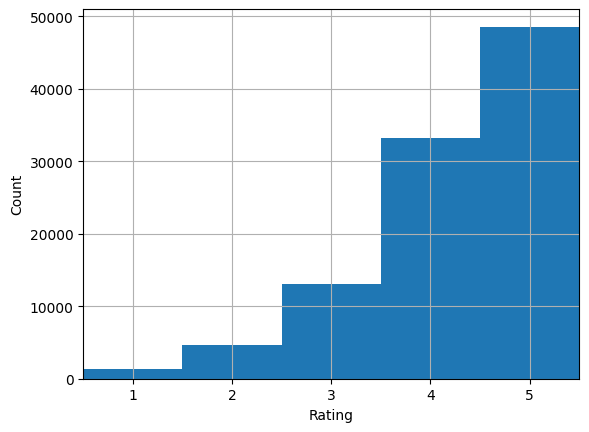

In [10]:
dfRatings.rating.hist(bins=5, range=(0,5))
plt.xticks(np.arange(0.5, 5.5), np.arange(1,6))
plt.xlim(0,5)
plt.xlabel("Rating")
plt.ylabel("Count")

In [11]:
dfMovies = pd.read_csv("./archive/movies.csv")
print("%i movies" % len(dfMovies))
dfMovies.head()

9742 movies


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [12]:
dfTags = pd.read_csv("./archive/tags.csv")
dfTags.head()

userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200

In [13]:
# are tags useful as input for recommender systems?
dfTags.tag.value_counts().head(20)


In Netflix queue      131
atmospheric            36
thought-provoking      24
superhero              24
funny                  23
surreal                23
Disney                 23
religion               22
sci-fi                 21
quirky                 21
dark comedy            21
psychology             21
suspense               20
twist ending           19
visually appealing     19
crime                  19
politics               18
mental illness         16
music                  16
time travel            16
Name: tag, dtype: int64

In [14]:
# Merge dfMovies and dfRatings
dfMovies2 = dfMovies.merge(dfRatings, on='movieId')
dfMovies2.head()
# dfMovies2.tail()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId  rating   timestamp  
0       1     4.0   964982703  
1       5     4.0   847434962  
2       7     4.5  1106635946  
3      15     2.5  1510577970  
4      17     4.5  1305696483

In [15]:
# Merge dfMovies and dfRatings
dfMovies3 = dfMovies2.merge(dfTags, on='movieId')
dfMovies3.head()
# dfMovies3.tail()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x  rating  timestamp_x  userId_y    tag  timestamp_y  
0         1     4.0    964982703       336  pixar   1139045764  
1         1     4.0    964982703       474  pixar   1137206825  
2         1     4.0    964982703       567    fun   1525286013  
3         5     4.0    847434962       336  pixar   1139045764  
4         5     4.0    847434962       474  pixar   1137206825

In [16]:
# take a look at how many ratings per movie there are
dfMovies2.groupby('title')['rating'].count().reset_index().rename(columns={"rating":"count"}).sort_values("count",
 ascending=False).head(10)

title  count
3158                        Forrest Gump (1994)    329
7593           Shawshank Redemption, The (1994)    317
6865                        Pulp Fiction (1994)    307
7680           Silence of the Lambs, The (1991)    279
5512                         Matrix, The (1999)    278
8001  Star Wars: Episode IV - A New Hope (1977)    251
4662                       Jurassic Park (1993)    238
1337                          Braveheart (1995)    237
8363          Terminator 2: Judgment Day (1991)    224
7421                    Schindler's List (1993)    220

In [17]:
df_rating_genre = dfMovies2[["title", "genres", "userId", "rating"]]
df_rating_genre

title  \
0                                Toy Story (1995)   
1                                Toy Story (1995)   
2                                Toy Story (1995)   
3                                Toy Story (1995)   
4                                Toy Story (1995)   
...                                           ...   
100831  Black Butler: Book of the Atlantic (2017)   
100832               No Game No Life: Zero (2017)   
100833                               Flint (2017)   
100834        Bungo Stray Dogs: Dead Apple (2018)   
100835        Andrew Dice Clay: Dice Rules (1991)   

                                             genres  userId  rating  
0       Adventure|Animation|Children|Comedy|Fantasy       1     4.0  
1       Adventure|Animation|Children|Comedy|Fantasy       5     4.0  
2       Adventure|Animation|Children|Comedy|Fantasy       7     4.5  
3       Adventure|Animation|Children|Comedy|Fantasy      15     2.5  
4       Adventure|Animation|Children|Comedy|Fantasy      17     4.5  
...                                             ...     ...     ...  
100831              Action|Animation|Comedy|Fantasy     184     4.0  
100832                     Animation|Comedy|Fantasy     184     3.5  
100833                                        Drama     184     3.5  
100834                             Action|Animation     184     3.5  
100835                                       Comedy     331     4.0  

[100836 rows x 4 columns]

In [18]:
# Build pivot table uuserID vs title
dfPivot = dfMovies2.pivot_table(columns='userId', index='title', values='rating')
dfPivot = dfPivot.fillna(0)
dfPivot.T

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              0.0                                      0.0   
2              0.0                                      0.0   
3              0.0                                      0.0   
4              0.0                                      0.0   
5              0.0                                      0.0   
...            ...                                      ...   
606            0.0                                      0.0   
607            0.0                                      0.0   
608            0.0                                      0.0   
609            0.0                                      0.0   
610            4.0                                      0.0   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          0.0                  0.0   
2                          0.0                  0.0   
3                          0.0                  0.0   
4                          0.0                  0.0   
5                          0.0                  0.0   
...                        ...                  ...   
606                        0.0                  0.0   
607                        0.0                  0.0   
608                        0.0                  0.0   
609                        0.0                  0.0   
610                        0.0                  0.0   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             0.0                              0.0   
2                             0.0                              0.0   
3                             0.0                              0.0   
4                             0.0                              0.0   
5                             0.0                              0.0   
...                           ...                              ...   
606                           0.0                              0.0   
607                           0.0                              0.0   
608                           0.0                              0.0   
609                           0.0                              0.0   
610                           0.0                              0.0   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      0.0                   0.0                          0.0   
2                      0.0                   0.0                          0.0   
3                      0.0                   0.0                          0.0   
4                      0.0                   0.0                          0.0   
5                      0.0                   0.0                          0.0   
...                    ...                   ...                          ...   
606                    0.0                   0.0                          0.0   
607                    0.0                   0.0                          0.0   
608                    0.0                   0.0                          0.0   
609                    0.0                   0.0                          0.0   
610                    0.0                   0.0                          3.5   

title   *batteries not included (1987)  ...  Zulu (2013)  [REC] (2007)  \
userId                                  ...                              
1                                  0.0  ...          0.0           0.0   
2                                  0.0  ...          0.0           0.0   
3                                  0.0  ...          0.0           0.0   
4                                  0.0  ...          0.0           0.0   
5                                  0.0  ...          0.

In [19]:
# mostly zeros!
userId_test = 15
print("User %i only rated %.2f%% of the movies" % (userId_test, len(dfPivot[userId_test][dfPivot[userId_test] != 0.0]) / len(dfPivot) * 100))

User 15 only rated 1.39% of the movies


In [20]:
#what movies are like other movies (movie correlation by ratings)

selected_movie = dfPivot.loc["(500) Days of Summer (2009)"]

# find the correlation between the movie and the rest

correlation = dfPivot.T.corrwith(selected_movie)

correlation = correlation.sort_values(ascending=False)
correlation.head(10)

title
(500) Days of Summer (2009)                1.000000
Silver Linings Playbook (2012)             0.501959
Adventureland (2009)                       0.462808
Up in the Air (2009)                       0.451984
50/50 (2011)                               0.449556
Descendants, The (2011)                    0.433110
Crazy, Stupid, Love. (2011)                0.430692
About Time (2013)                          0.420257
Toy Story 3 (2010)                         0.420154
Secret Life of Walter Mitty, The (2013)    0.417219
dtype: float64

In [21]:
selected_movie = dfPivot.loc["Toy Story (1995)"]

# find the correlation between the movie and the rest

correlation = dfPivot.T.corrwith(selected_movie)

correlation = correlation.sort_values(ascending=False)
correlation.head(10)

title
Toy Story (1995)                              1.000000
Toy Story 2 (1999)                            0.461761
Groundhog Day (1993)                          0.361540
Independence Day (a.k.a. ID4) (1996)          0.358473
Willy Wonka & the Chocolate Factory (1971)    0.357314
Mission: Impossible (1996)                    0.352847
Nutty Professor, The (1996)                   0.350295
Bug's Life, A (1998)                          0.345431
Lion King, The (1994)                         0.344248
Babe (1995)                                   0.341136
dtype: float64

In [22]:
# Using nearest neighbors
### change the metric? cosine, euclidean
import sklearn.neighbors
model = sklearn.neighbors.NearestNeighbors(n_neighbors=7, algorithm='brute', metric='euclidean')

In [23]:
help(model.fit)

Help on method fit in module sklearn.neighbors._unsupervised:

fit(X, y=None) method of sklearn.neighbors._unsupervised.NearestNeighbors instance
    Fit the nearest neighbors estimator from the training dataset.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features) or                 (n_samples, n_samples) if metric='precomputed'
        Training data.
    
    y : Ignored
        Not used, present for API consistency by convention.
    
    Returns
    -------
    self : NearestNeighbors
        The fitted nearest neighbors estimator.



In [24]:
#

In [25]:
model.fit(dfPivot)


NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=7)

In [26]:
movie = "Pulp Fiction (1994)"
distances, suggestions = model.kneighbors([dfPivot.loc[movie]])

# with movie names
list(zip(dfPivot.iloc[suggestions[0]].index.tolist(), np.round(distances[0], 4)))

[('Pulp Fiction (1994)', 0.0),
 ('Seven (a.k.a. Se7en) (1995)', 54.3024),
 ('Silence of the Lambs, The (1991)', 55.9397),
 ('Usual Suspects, The (1995)', 56.8463),
 ('Shawshank Redemption, The (1994)', 60.0396),
 ('Reservoir Dogs (1992)', 60.1914),
 ('Forrest Gump (1994)', 60.4545)]

In [27]:
dfSuggestedNeighbors = dfPivot.iloc[suggestions[0]]

dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]

userId                            1    2    4    5    6    7    8    10   11   \
title                                                                           
Pulp Fiction (1994)               3.0  0.0  1.0  5.0  2.0  0.0  4.0  1.0  0.0   
Seven (a.k.a. Se7en) (1995)       5.0  0.0  2.0  0.0  4.0  0.0  4.0  0.0  0.0   
Silence of the Lambs, The (1991)  4.0  0.0  5.0  0.0  4.0  5.0  4.0  0.0  5.0   
Usual Suspects, The (1995)        5.0  0.0  0.0  4.0  1.0  4.5  5.0  0.0  0.0   
Shawshank Redemption, The (1994)  0.0  3.0  0.0  3.0  5.0  0.0  5.0  0.0  4.0   
Reservoir Dogs (1992)             5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Forrest Gump (1994)               4.0  0.0  0.0  0.0  5.0  5.0  3.0  3.5  5.0   

userId                            13   ...  601  602  603  604  605  606  607  \
title                                  ...                                      
Pulp Fiction (1994)               0.0  ...  0.0  5.0  5.0  5.0  2.0  5.0  3.0   
Seven (a.k.a. Se7en) (1995)       5.0  ...  4.0  5.0  0.0  0.0  0.0  3.0  0.0   
Silence of the Lambs, The (1991)  0.0  ...  0.0  5.0  5.0  5.0  0.0  4.5  5.0   
Usual Suspects, The (1995)        0.0  ...  5.0  5.0  0.0  0.0  0.0  4.5  0.0   
Shawshank Redemption, The (1994)  0.0  ...  5.0  5.0  0.0  0.0  0.0  3.5  5.0   
Reservoir Dogs (1992)             0.0  ...  0.0  0.0  5.0  0.0  0.0  5.0  0.0   
Forrest Gump (1994)               0.0  ...  0.0  3.0  3.0  0.0  3.0  4.0  0.0   

userId                            608  609  610  
title                                            
Pulp Fiction (1994)               5.0  4.0  5.0  
Seven (a.k.a. Se7en) (1995)       4.5  0.0  5.0  
Silence of the Lambs, The (1991)  4.0  0.0  4.5  
Usual Suspects, The (1995)        4.5  0.0  4.0  
Shawshank Redemption, The (1994)  4.5  4.0  3.0  
Reservoir Dogs (1992)             4.0  0.0  5.0  
Forrest Gump (1994)               3.0  4.0  3.0  

[7 rows x 484 columns]

In [28]:
# find similar users
userId_test = 8
# dfPivot[userId_test] 
dfPivot[dfPivot[userId_test] != 0.0]

userId                                              1    2    3    4    5    \
title                                                                         
American President, The (1995)                      0.0  0.0  0.0  0.0  0.0   
Apollo 13 (1995)                                    0.0  0.0  0.0  0.0  3.0   
Babe (1995)                                         0.0  0.0  0.0  0.0  4.0   
Batman (1989)                                       4.0  0.0  0.0  0.0  3.0   
Batman Forever (1995)                               0.0  0.0  0.0  0.0  3.0   
Birdcage, The (1996)                                0.0  0.0  0.0  0.0  0.0   
Braveheart (1995)                                   4.0  0.0  0.0  0.0  4.0   
City Slickers II: The Legend of Curly's Gold (1...  0.0  0.0  0.0  0.0  0.0   
Clueless (1995)                                     0.0  0.0  0.0  0.0  3.0   
Dances with Wolves (1990)                           4.0  0.0  0.0  0.0  5.0   
Dave (1993)                                         0.0  0.0  0.0  0.0  0.0   
Dumb & Dumber (Dumb and Dumber) (1994)              5.0  0.0  0.0  0.0  0.0   
Ed Wood (1994)                                      4.0  0.0  0.0  2.0  0.0   
Firm, The (1993)                                    0.0  0.0  0.0  0.0  0.0   
Forrest Gump (1994)                                 4.0  0.0  0.0  0.0  0.0   
Four Weddings and a Funeral (1994)                  0.0  0.0  0.0  3.0  2.0   
French Kiss (1995)                                  0.0  0.0  0.0  0.0  0.0   
Fugitive, The (1993)                                5.0  0.0  0.0  5.0  4.0   
Get Shorty (1995)                                   0.0  0.0  0.0  3.0  4.0   
Ghost (1990)                                        0.0  0.0  0.0  0.0  0.0   
GoldenEye (1995)                                    0.0  0.0  0.0  0.0  0.0   
Home Alone (1990)                                   0.0  0.0  0.0  0.0  0.0   
I.Q. (1994)                                         0.0  0.0  0.0  0.0  0.0   
Interview with the Vampire: The Vampire Chronic...  0.0  0.0  0.0  0.0  3.0   
Jumanji (1995)                                      0.0  0.0  0.0  0.0  0.0   
Jurassic Park (1993)                                4.0  0.0  0.0  0.0  0.0   
Lion King, The (1994)                               0.0  0.0  0.0  0.0  3.0   
Mask, The (1994)                                    4.0  0.0  0.0  0.0  4.0   
Mrs. Doubtfire (1993)                               3.0  0.0  0.0  0.0  0.0   
Nell (1994)                                         0.0  0.0  0.0  0.0  0.0   
Net, The (1995)                                     0.0  0.0  0.0  0.0  0.0   
Nine Months (1995)                                  0.0  0.0  0.0  0.0  0.0   
Outbreak (1995)                                     0.0  0.0  0.0  0.0  0.0   
Pretty Woman (1990)                                 0.0  0.0  0.0  0.0  3.0   
Pulp Fiction (1994)                                 3.0  0.0  0.0  1.0  5.0   
Santa Clause, The (1994)                            0.0  0.0  0.0  0.0  0.0   
Schindler's List (1993)                             5.0  0.0  0.5  0.0  5.0   
Seven (a.k.a. Se7en) (1995)                         5.0  0.0  0.0  2.0  0.0   
Shawshank Redemption, The (1994)                    0.0  3.0  0.0  0.0  3.0   
Silence of the Lambs, The (1991)                    4.0  0.0  0.0  5.0  0.0   
Sleepless in Seattle (1993)                         0.0  0.0  0.0  1.0  0.0   
Speed (1994)                                        0.0  0.0  0.0  0.0  0.0   
True Lies (1994)                                    0.0  0.0  0.0  0.0  2.0   
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)           0.0  0.0  0.0  2.0  0.0   
Usual Suspects, The (1995)                          5.0  0.0  0.0  0.0  4.0   
Waterworld (1995)                                   0.0  0.0  0.0  0.0  0.0   
While You Were Sleeping (1995)                      0.0  0.0  0.0  0.0  0.0   

userId                                              6    7    8    9    10   \
title                                            

In [29]:
model.fit(dfPivot.T)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=7)

In [30]:
distances, suggestions = model.kneighbors([dfPivot[userId_test]])

distances, suggestions

/opt/jupyterhub/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([[ 0.        , 18.76166304, 20.29778313, 20.34698995, 20.83266666,
         20.95232684, 21.23676058]]),
 array([[  7, 378,  93, 564, 346, 125, 132]]))

In [31]:
dfSuggestedNeighbors = dfPivot.T.iloc[suggestions[0]]

# kick all the movies none of the neighbors have seen
dfSuggestedNeighbors = dfSuggestedNeighbors.loc[:, (dfSuggestedNeighbors != 0).any(axis=0)]
dfSuggestedNeighbors

title   Ace Ventura: Pet Detective (1994)  \
userId                                      
8                                     0.0   
379                                   2.0   
94                                    3.0   
565                                   3.0   
347                                   3.0   
126                                   1.0   
133                                   0.0   

title   Ace Ventura: When Nature Calls (1995)  Addams Family Values (1993)  \
userId                                                                       
8                                         0.0                          0.0   
379                                       2.0                          0.0   
94                                        2.0                          3.0   
565                                       3.0                          0.0   
347                                       4.0                          0.0   
126                                       0.0                          2.0   
133                                       0.0                          0.0   

title   Aladdin (1992)  American President, The (1995)  Apollo 13 (1995)  \
userId                                                                     
8                  0.0                             4.0               4.0   
379                0.0                             0.0               5.0   
94                 4.0                             3.0               4.0   
565                3.0                             0.0               3.0   
347                4.0                             4.0               4.0   
126                3.0                             0.0               4.0   
133                3.0                             0.0               3.0   

title   Babe (1995)  Batman (1989)  Batman Forever (1995)  \
userId                                                      
8               5.0            3.0                    2.0   
379             5.0            3.0                    3.0   
94              4.0            3.0                    3.0   
565             4.0            2.0                    2.0   
347             4.0            3.0                    3.0   
126             3.0            3.0                    4.0   
133             0.0            3.0                    1.0   

title   Beauty and the Beast (1991)  ...  Stargate (1994)  \
userId                               ...                    
8                               0.0  ...              0.0   
379                             0.0  ...              3.0   
94                              0.0  ...              4.0   
565                             0.0  ...              0.0   
347                             4.0  ...              3.0   
126                             4.0  ...              1.0   
133                             0.0  ...              0.0   

title   Terminator 2: Judgment Day (1991)  Toy Story (1995)  True Lies (1994)  \
userId                                                                          
8                                     0.0               0.0               5.0   
379                                   4.0               0.0               4.0   
94                                    4.0               0.0               3.0   
565                                   0.0               0.0               4.0   
347                                   3.0               5.0               3.0   
126                                   3.0               0.0               5.0   
133                                   3.0               0.0               3.0   

title   True Romance (1993)  Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  \
userId                                                                   
8                       0.0                                        3.0   
379                     0.0                                        0.0   
94                      0.0                                        5.0   
565   

In [32]:
dfNotSeenByUser = dfSuggestedNeighbors.T[0.0 == dfSuggestedNeighbors.T[userId_test]].T

In [33]:
dfNotSeenByUser.mean().sort_values(ascending=False).head(10)

title
Terminator 2: Judgment Day (1991)        2.428571
Aladdin (1992)                           2.428571
Die Hard: With a Vengeance (1995)        2.285714
Ace Ventura: Pet Detective (1994)        1.714286
Cliffhanger (1993)                       1.714286
Stargate (1994)                          1.571429
Ace Ventura: When Nature Calls (1995)    1.571429
Crimson Tide (1995)                      1.571429
Clear and Present Danger (1994)          1.428571
Quiz Show (1994)                         1.285714
dtype: float64

In [34]:
(dfNotSeenByUser.mean() * dfNotSeenByUser.replace({0:np.nan}).count()).sort_values(ascending=False).head(10)

title
Terminator 2: Judgment Day (1991)        12.142857
Aladdin (1992)                           12.142857
Die Hard: With a Vengeance (1995)        11.428571
Ace Ventura: Pet Detective (1994)         8.571429
Cliffhanger (1993)                        6.857143
Stargate (1994)                           6.285714
Ace Ventura: When Nature Calls (1995)     6.285714
Crimson Tide (1995)                       4.714286
Clear and Present Danger (1994)           4.285714
Quiz Show (1994)                          3.857143
dtype: float64